In [1]:
# https://people.duke.edu/~ccc14/sta-663/MCMC.html
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from functools import partial

np.random.seed(1234)
n = 100
h = 61
p = h/n
rv = st.binom(n, p)
mu = rv.mean()

a, b = 10, 10
prior = st.beta(a, b)
post = st.beta(h+a, n-h+b)
ci = post.interval(0.95)

thetas = np.linspace(0, 1, 200)

array([  0.0000e+000,   4.3606e-113,   8.2531e-095,   3.7324e-084,
         1.2782e-076,   8.5319e-071,   4.7159e-066,   4.6702e-062,
         1.3134e-058,   1.4119e-055,   7.1059e-053,   1.9352e-050,
         3.1731e-048,   3.3975e-046,   2.5300e-044,   1.3774e-042,
         5.7084e-041,   1.8611e-039,   4.9056e-038,   1.0696e-036,
         1.9665e-035,   3.1000e-034,   4.2496e-033,   5.1286e-032,
         5.5078e-031,   5.3133e-030,   4.6428e-029,   3.7017e-028,
         2.7108e-027,   1.8340e-026,   1.1523e-025,   6.7567e-025,
         3.7128e-024,   1.9194e-023,   9.3690e-023,   4.3318e-022,
         1.9027e-021,   7.9615e-021,   3.1814e-020,   1.2168e-019,
         4.4643e-019,   1.5742e-018,   5.3444e-018,   1.7500e-017,
         5.5355e-017,   1.6939e-016,   5.0211e-016,   1.4437e-015,
         4.0311e-015,   1.0943e-014,   2.8910e-014,   7.4404e-014,
         1.8672e-013,   4.5729e-013,   1.0939e-012,   2.5578e-012,
         5.8503e-012,   1.3098e-011,   2.8725e-011,   6.1741e-

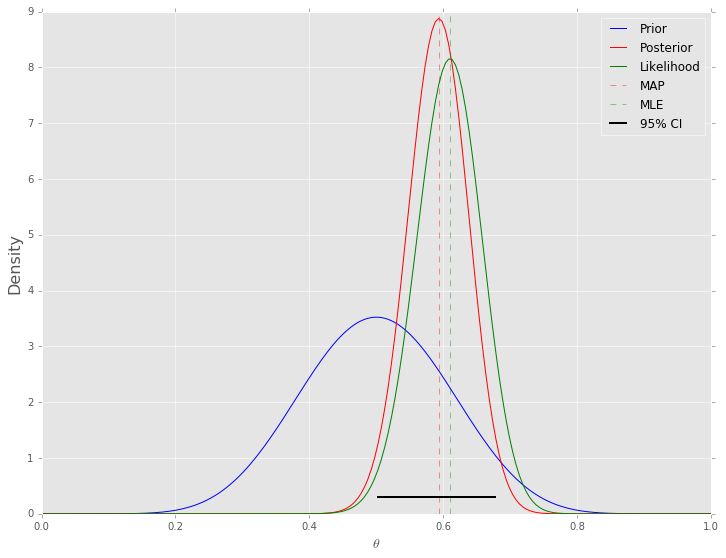

In [19]:
plt.figure(figsize=(12, 9))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.plot(thetas, n*st.binom(n, thetas).pmf(h), label='Likelihood', c='green')
plt.axvline((h+a-1)/(n+a+b-2), c='red', linestyle='dashed', alpha=0.4, label='MAP')
plt.axvline(mu/n, c='green', linestyle='dashed', alpha=0.4, label='MLE')
plt.xlim([0, 1])
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

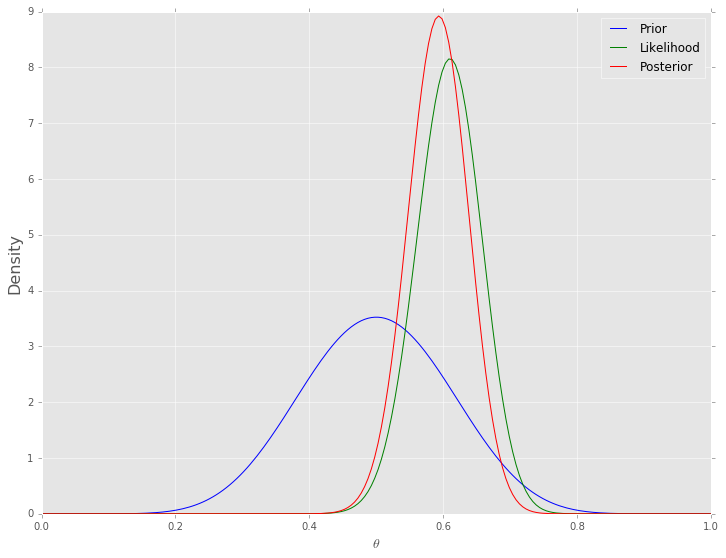

In [28]:
thetas = np.linspace(0, 1, 200)
prior = st.beta(a, b)

post = prior.pdf(thetas) * st.binom(n, thetas).pmf(h)
post /= (post.sum() / len(thetas))

plt.figure(figsize=(12, 9))
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, n*st.binom(n, thetas).pmf(h), label='Likelihood', c='green')
plt.plot(thetas, post, label='Posterior', c='red')
plt.xlim([0, 1])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();